In [2]:
#"""
# extract_face(face: Image.fromarray) -> dict

# for face in faces:
#     - face = ToArray(face)
#     - data = PredictFace(face)
#     - blobUrl = UploadFaceToBucket(face)
#     - InsertDataToDB(data, blobURL)
# """

In [9]:
from extract import Extract
from predict import Predict 
from matplotlib import pyplot as plt 
import cv2
import numpy as np
from facenet_pytorch import MTCNN

In [10]:
data = predict.predict_face(image_1)

NameError: name 'predict' is not defined

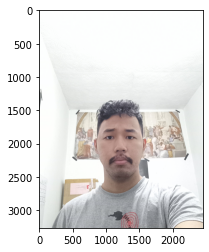

In [11]:
image_path = "D:\\bangkit-project\\ml-project\\test_image\\20210601_133035.jpg"
img = cv2.cvtColor(cv2.imread(image_path), cv2.COLOR_BGR2RGB)
plt.imshow(img)

In [12]:
extract = Extract()
list_of_faces = extract.extract_face_to_list(img)

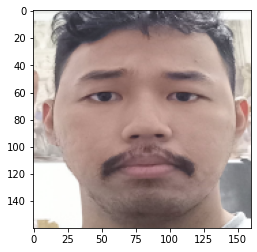

In [13]:
list_of_faces[0].dtype
image_1=np.array(list_of_faces[0], dtype='uint8')
plt.imshow(image_1)

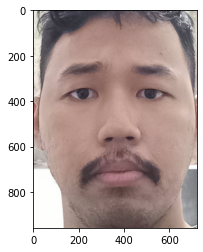

In [14]:
import mtcnn
detector = mtcnn.MTCNN()
x = detector.detect_faces(img)
x1, y1, width, height = x[0]['box']
x1, y1 = abs(x1) , abs(y1)
x2, y2 = x1 + width , y1 + height
face = img[y1:y2 , x1:x2]
plt.imshow(face)


In [15]:
face.shape

(958, 721, 3)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


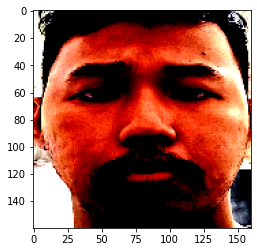

In [21]:
def normalize(img):
    mean, std = img.mean(), img.std()
    return (img - mean) / std
required_shape = (160,160)
face = normalize(face)
face = cv2.resize(face, required_shape)
plt.imshow(face)

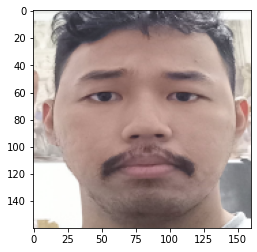

In [22]:
from predict import Predict

predict = Predict("D:/bangkit-project/ml-project/encodings.pkl", "D:/bangkit-project/ml-project/model/facenet_keras_weights.h5")
plt.imshow(image_1)


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


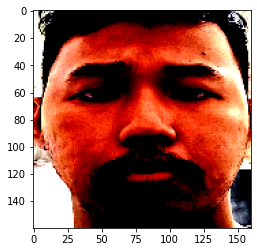

In [23]:
plt.imshow(face)

In [24]:
data = predict.predict_face(face)

Distance from Brad_Pitt is 0.9366620928049088
Distance from ElonMusk is 0.9016473367810249
Distance from EricAndre is 0.8126765638589859
Distance from GwynethPaltrow is 0.7929518222808838
Distance from Zein is 0.41978782415390015
This is Zein with Distance 0.41978782415390015


In [25]:
predict.predict_face(image_1)

Distance from Brad_Pitt is 0.9153850823640823
Distance from ElonMusk is 0.9057608768343925
Distance from EricAndre is 0.8036588579416275
Distance from GwynethPaltrow is 0.7799132913351059
Distance from Zein is 0.42027539014816284
This is Zein with Distance 0.42027539014816284


[{'name': 'Zein', 'percentage': 0.42027539014816284}]

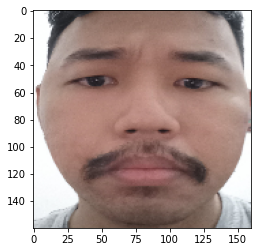

In [33]:
# This is what the train image that got encode
image_path = "D:\\bangkit-project\\ml-project\\image\\Zein\\20210601_123347.jpg"
img_BGR = cv2.imread(image_path)
img_RGB = cv2.cvtColor(img_BGR, cv2.COLOR_BGR2RGB)

import mtcnn
detector = mtcnn.MTCNN()
x = detector.detect_faces(img_RGB)
x1, y1, width, height = x[0]['box']
x1, y1 = abs(x1) , abs(y1)
x2, y2 = x1 + width , y1 + height
face = img_RGB[y1:y2 , x1:x2]

# def normalize(img):
#     mean, std = img.mean(), img.std()
#     return (img - mean) / std
# required_shape = (160,160)
# face = normalize(face)
face = cv2.resize(face, required_shape)
plt.imshow(face)